In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv("customer-churn.csv")
df

,is_senior_citizen,num_months,has_phone_service,internet_service_type,contract_type,is_billing_paperless,payment_type,monthly_charges,total_charges,churned
0,0,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,34,Yes,DSL,One year,No,Mailed check,56.95,1889.5,No
2,0,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,45,No,DSL,One year,No,Bank transfer,42.30,1840.75,No
4,0,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,0,24,Yes,DSL,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,72,Yes,Fiber optic,One year,Yes,Credit card,103.20,7362.9,No
7040,0,11,No,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.dtypes

is_senior_citizen          int64
num_months                 int64
has_phone_service         object
internet_service_type     object
contract_type             object
is_billing_paperless      object
payment_type              object
monthly_charges          float64
total_charges             object
churned                   object
dtype: object

In [8]:
df.count

<bound method DataFrame.count of       is_senior_citizen  num_months has_phone_service internet_service_type  \
0                     0           1                No                   DSL   
1                     0          34               Yes                   DSL   
2                     0           2               Yes                   DSL   
3                     0          45                No                   DSL   
4                     0           2               Yes           Fiber optic   
...                 ...         ...               ...                   ...   
7038                  0          24               Yes                   DSL   
7039                  0          72               Yes           Fiber optic   
7040                  0          11                No                   DSL   
7041                  1           4               Yes           Fiber optic   
7042                  0          66               Yes           Fiber optic   

       contract_ty

In [9]:
df.shape

(7043, 10)

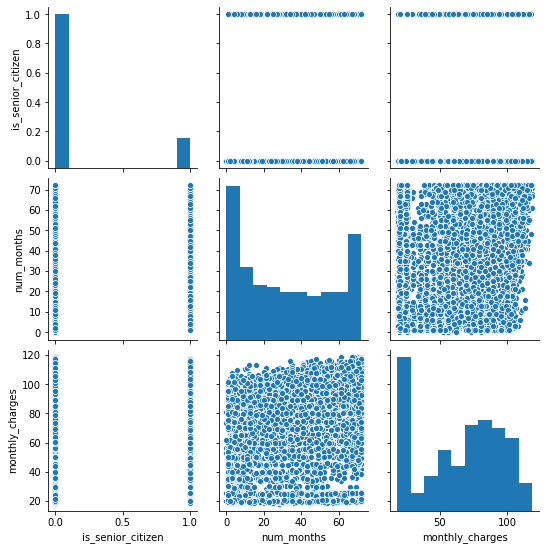

In [17]:
sns.pairplot(df)

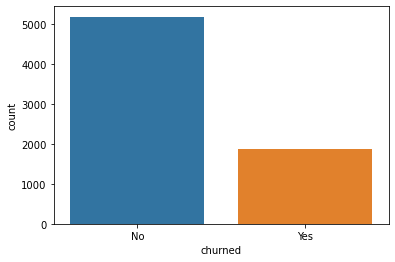

In [18]:
sns.countplot(df["churned"],label="count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F62F3C8>,
      dtype=object)

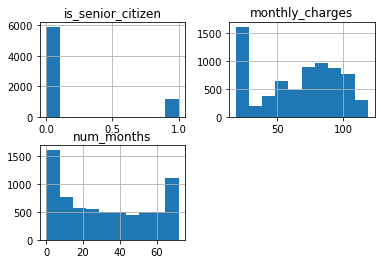

In [15]:
df.hist()

In [18]:
replace_value={'internet_service_type':{'No':0,'DSL':1,'Fiber optic':2},
               'contract_type':{'Month-to-month':0,'One year':1,'Two year':2},
               'payment_type':{'Bank transfer':0,'Credit card':1,'Electronic check':2,'Mailed check':3}}
df.replace(replace_value,inplace=True)



In [20]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['is_billing_paperless']=lb.fit_transform(df['is_billing_paperless'])
df['has_phone_service']=lb.fit_transform(df['has_phone_service'])
df['churned']=lb.fit_transform(df['churned'])
df

,is_senior_citizen,num_months,has_phone_service,internet_service_type,contract_type,is_billing_paperless,payment_type,monthly_charges,total_charges,churned
0,0,1,0,1,0,1,2,29.85,29.85,0
1,0,34,1,1,1,0,3,56.95,1889.5,0
2,0,2,1,1,0,1,3,53.85,108.15,1
3,0,45,0,1,1,0,0,42.30,1840.75,0
4,0,2,1,2,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1,1,1,1,3,84.80,1990.5,0
7039,0,72,1,2,1,1,1,103.20,7362.9,0
7040,0,11,0,1,0,1,2,29.60,346.45,0
7041,1,4,1,2,0,1,3,74.40,306.6,1


In [21]:
correlation=df.iloc[:,:].corr()
correlation

,is_senior_citizen,num_months,has_phone_service,internet_service_type,contract_type,is_billing_paperless,payment_type,monthly_charges,churned
is_senior_citizen,1.000000,0.016567,0.008576,0.259390,-0.142554,0.156530,-0.038551,0.220173,0.150889
num_months,0.016567,1.000000,0.008448,0.033230,0.671607,0.006152,-0.370436,0.247900,-0.352229
has_phone_service,0.008576,0.008448,1.000000,0.093720,0.002247,0.016505,-0.004184,0.247398,0.011942
internet_service_type,0.259390,0.033230,0.093720,1.000000,-0.290189,0.378108,-0.120971,0.905491,0.316846
contract_type,-0.142554,0.671607,0.002247,-0.290189,1.000000,-0.176733,-0.227543,-0.074195,-0.396713
is_billing_paperless,0.156530,0.006152,0.016505,0.378108,-0.176733,1.000000,-0.062904,0.352150,0.191825
payment_type,-0.038551,-0.370436,-0.004184,-0.120971,-0.227543,-0.062904,1.000000,-0.193407,0.107062
monthly_charges,0.220173,0.247900,0.247398,0.905491,-0.074195,0.352150,-0.193407,1.000000,0.193356
churned,0.150889,-0.352229,0.011942,0.316846,-0.396713,0.191825,0.107062,0.193356,1.000000


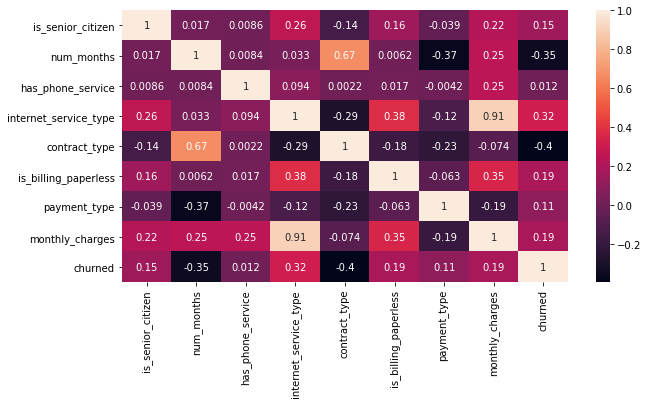

In [23]:
plt.figure(figsize=(10,5))

correlation_matrix=df.corr()

sns.heatmap(correlation_matrix,annot=True)

In [27]:
x=df.iloc[:,1:8].values

x

array([[  1.  ,   0.  ,   1.  , ...,   1.  ,   2.  ,  29.85],
       [ 34.  ,   1.  ,   1.  , ...,   0.  ,   3.  ,  56.95],
       [  2.  ,   1.  ,   1.  , ...,   1.  ,   3.  ,  53.85],
       ...,
       [ 11.  ,   0.  ,   1.  , ...,   1.  ,   2.  ,  29.6 ],
       [  4.  ,   1.  ,   2.  , ...,   1.  ,   3.  ,  74.4 ],
       [ 66.  ,   1.  ,   2.  , ...,   1.  ,   0.  , 105.65]])

In [28]:
y=df.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.66,random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2394, 7) (2394,)
Test set: (4649, 7) (4649,)


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [59]:
print("Random forest")
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

print("f1 score:",f1_score(y_test, y_pred,average="micro"))
print("accuracy score:", accuracy_score(y_test, y_pred))

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification report")
print(classification_report(y_test,y_pred))


Random forest
f1 score: 0.7760808776080877
accuracy score: 0.7760808776080877
confusion matrix:
[[2998  390]
 [ 651  610]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3388
           1       0.61      0.48      0.54      1261

    accuracy                           0.78      4649
   macro avg       0.72      0.68      0.70      4649
weighted avg       0.76      0.78      0.77      4649



In [61]:
print("naive bayes")
from sklearn.naive_bayes import GaussianNB


naive_bayes = GaussianNB()


naive_bayes.fit(x_train , y_train)


y_pred = naive_bayes.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))
print("confustion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred,average="micro"))
print("classification report:")
print(classification_report(y_test,y_pred))

naive bayes
accuracy score: 0.7457517745751775
confustion matrix:
 [[2541  847]
 [ 335  926]]
f1 score: 0.7457517745751775
classification report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3388
           1       0.52      0.73      0.61      1261

    accuracy                           0.75      4649
   macro avg       0.70      0.74      0.71      4649
weighted avg       0.79      0.75      0.76      4649



In [62]:
print("Support Vector Machine")
from sklearn.svm import SVC
classifier = SVC(decision_function_shape='ovo')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))
print("confustion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred,average="micro"))
print("classification report:")
print(classification_report(y_test,y_pred))

Support Vector Machine
accuracy score: 0.7879113787911379
confustion matrix:
 [[3101  287]
 [ 699  562]]
f1 score: 0.7879113787911379
classification report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3388
           1       0.66      0.45      0.53      1261

    accuracy                           0.79      4649
   macro avg       0.74      0.68      0.70      4649
weighted avg       0.77      0.79      0.77      4649

